# `music21` Documentation
https://www.music21.org/music21docs/index.html

In [58]:
from music21 import *

In [59]:
environment.set("musescoreDirectPNGPath", "/usr/bin/mscore")

In [60]:
from music21 import chord

def generate_lilypond_file(chord_progression):
    """
    Generates a LilyPond file for the given chord progression.
    Each chord is dynamically expanded into its notes using Music21.

    Args:
        chord_progression (list): A list of chord names (e.g., ["C", "Dm", "G7"]).

    Returns:
        str: The LilyPond content as a string.
    """
    lilypond_chords = []

    for chord_name in chord_progression:
        try:
            # Use Music21 to parse the chord and get the pitches
            music21_chord = chord.Chord(chord_name)
            # Format the pitches in LilyPond syntax
            lilypond_representation = "<" + " ".join(p.name.lower() for p in music21_chord.pitches) + ">"
            lilypond_chords.append(lilypond_representation)
        except Exception as e:
            print(f"Error processing chord {chord_name}: {e}")
            continue

    # Construct the LilyPond content
    lilypond_content = "\\version \"2.24.2\"\n"  # Ensure LilyPond version is specified
    lilypond_content += "\\score {\n"
    lilypond_content += "  \\new Staff {\n"
    lilypond_content += "    " + " ".join(lilypond_chords) + "\n"
    lilypond_content += "  }\n"
    lilypond_content += "  \\layout { }\n"
    lilypond_content += "}\n"

    return lilypond_content


In [61]:
# Example chord progression
chord_progression = ["C", "Dm", "G7", "Am"]

# Generate LilyPond content
lilypond_content = generate_lilypond_file(chord_progression)

# Save to file
with open("chord_progression.ly", "w") as f:
    f.write(lilypond_content)

print("LilyPond file created successfully!")


Error processing chord Dm: m is not a supported accidental type
Error processing chord Am: m is not a supported accidental type
LilyPond file created successfully!


In [62]:
import subprocess

# Render the LilyPond file to a PNG image
try:
    subprocess.run(["lilypond", "--png", "chord_progression.ly"], check=True)
    print("PNG file generated successfully!")
except Exception as e:
    print(f"Error rendering LilyPond file: {e}")


Processing `chord_progression.ly'
Parsing...
Interpreting music...
Preprocessing graphical objects...
Finding the ideal number of pages...
Fitting music on 1 page...
Drawing systems...
Converting to PNG...

PNG file generated successfully!



Success: compilation successfully completed


## Chapter 2: Notes

In [63]:
note

<module 'music21.note' from '/home/sam/.pyenv/versions/3.8.10/envs/tensorflow-env/lib/python3.8/site-packages/music21/note.py'>

In [64]:
dir(note)

['Duration',
 'GeneralNote',
 'Lyric',
 'LyricException',
 'NotRest',
 'NotRestException',
 'Note',
 'NoteException',
 'OffsetQLIn',
 'Pitch',
 'Rest',
 'SYLLABIC_CHOICES',
 'StepName',
 'SyllabicChoices',
 'Unpitched',
 'annotations',
 'base',
 'beam',
 'common',
 'environLocal',
 'environment',
 'exceptions21',
 'expressions',
 'interval',
 'noteheadTypeNames',
 'overload',
 'prebase',
 'stemDirectionNames',
 'style',
 'tie',
 'volume']

In [65]:
f = note.Note("F5")
f

<music21.note.Note F>

In [66]:
f.name, f.octave

('F', 5)

In [67]:
f.pitch

<music21.pitch.Pitch F5>

In [68]:
f.pitch.frequency

698.456462866008

In [69]:
f.pitch.pitchClassString

'5'

In [70]:
f.pitch.pitchClass

5

In [71]:
bflat = note.Note("B-2")

In [72]:
# Object "Accidental"
bflat.pitch.accidental

<music21.pitch.Accidental flat>

In [73]:
acc = bflat.pitch.accidental

In [74]:
acc.alter

-1.0

In [75]:
acc.displayLocation

'normal'

In [76]:
acc.displayLocation = 'above'
acc.displayLocation

'above'

In [77]:
bflat.pitch.accidental.displayLocation

'above'

In [78]:
# Python is one of those cool computer languages where if an object doesn’t have a particular attribute
# but you think it should, you can add it to the object
bflat.wasWrittenByStockhausen

AttributeError: 'Note' object has no attribute 'wasWrittenByStockhausen'

In [79]:
bflat.wasWrittenByStockhausen = True
f.wasWrittenByStockhausen = False

In [80]:
if bflat.wasWrittenByStockhausen == True:
    print("Hope you're enjoying Sirius!")

Hope you're enjoying Sirius!


In [81]:
if f.wasWrittenByStockhausen == True:
    print("I love Helicopters!")

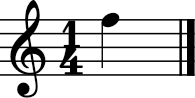

In [82]:
# If you’ve installed a MusicXML reader such as MuseScore, Finale, Sibelius, or Dorico, you can type:
f.show()

In [83]:
f.show('midi')

In [84]:
d = bflat.transpose("M3")
d

<music21.note.Note D>

In [85]:
bflat.transpose("P4", inPlace=True)
bflat

<music21.note.Note E->

In [86]:
whatNoteIsThis = d.transpose('dd6')
whatNoteIsThis

<music21.note.Note B--->

In [87]:
whatNoteIsThis.pitch.accidental.alter

-3.0

In [88]:
whatNoteIsThis.pitch.accidental.name

'triple-flat'

In [89]:
print(d.pitch.accidental)

None


In [90]:
d.pitch.accidental.name

AttributeError: 'NoneType' object has no attribute 'name'

In [91]:
if d.pitch.accidental is not None:
    print(d.pitch.accidental.name)

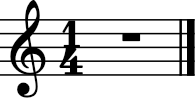

In [92]:
r = note.Rest()
r.show()

In [93]:
r.pitch

AttributeError: 'Rest' object has no attribute 'pitch'

## Chapter 3: Pitches, Durations, and Notes again

In [94]:
p1 = pitch.Pitch('b-4')
p1

<music21.pitch.Pitch B-4>

In [95]:
p1.octave, p1.pitchClass, p1.name, p1.accidental.alter

(4, 10, 'B-', -1.0)

In [96]:
p1.nameWithOctave

'B-4'

In [97]:
p1.midi

70

In [98]:
p1.name = 'd#'
p1.octave = 3
p1.nameWithOctave

'D#3'

In [99]:
p2 = p1.transpose('M7')
p2

<music21.pitch.Pitch C##4>

In [100]:
repr(p2)

'<music21.pitch.Pitch C##4>'

In [101]:
csharp = note.Note('C#4')
csharp.name

'C#'

In [102]:
csharp.pitch.name

'C#'

In [103]:
csharp.octave, csharp.pitch.octave

(4, 4)

In [104]:
csharp.pitch.spanish

'do sostenido'

In [105]:
csharp.spanish

AttributeError: 'Note' object has no attribute 'spanish'

In [106]:
print(csharp.pitch.unicodeName)

C♯


In [107]:
print( csharp.pitch.getEnharmonic() )
print( csharp.pitch.getLowerEnharmonic() )

D-4
B##3


### Carving time with Duration objects

In [108]:
halfDuration = duration.Duration('half')
halfDuration

<music21.duration.Duration 2.0>

In [109]:
dottedQuarter = duration.Duration(1.5)
dottedQuarter

<music21.duration.Duration 1.5>

In [110]:
halfDuration.quarterLength, dottedQuarter.quarterLength,

(2.0, 1.5)

In [111]:
halfDuration.type, dottedQuarter.type

('half', 'quarter')

In [112]:
halfDuration.dots, dottedQuarter.dots

(0, 1)

In [113]:
# The attributes of dots, type, and quarterLength are actually special attributes called “properties”.
# A property is an attribute that is smart in some way.
dottedQuarter.dots = 2
dottedQuarter.quarterLength

1.75

In [114]:
dottedQuarter.dots = 3
dottedQuarter.quarterLength

1.875

In [115]:
dottedQuarter.dots = 4
dottedQuarter.quarterLength

1.9375

In [116]:
dottedQuarter.quarterLength = 0.25
dottedQuarter.type

'16th'

In [117]:
dottedQuarter.dots

0

In [118]:
n1 = note.Note()
n1.pitch, n1.duration

(<music21.pitch.Pitch C4>, <music21.duration.Duration 1.0>)

In [119]:
n1.pitch.nameWithOctave = 'E-5'
n1.duration.quarterLength = 3.0

In [120]:
n1.duration.type, n1.duration.dots, n1.pitch.name, n1.pitch.accidental, n1.octave

('half', 1, 'E-', <music21.pitch.Accidental flat>, 5)

In [121]:
n1.name, n1.quarterLength

('E-', 3.0)

In [122]:
n1.quarterLength = 1.0

In [123]:
otherNote = note.Note("F6")
otherNote.lyric = "I'm the Queen of the Night!"

In [124]:
n1.addLyric(n1.nameWithOctave)
n1.addLyric(n1.pitch.pitchClassString)

In [125]:
n1.addLyric(f'QL: {n1.quarterLength}')

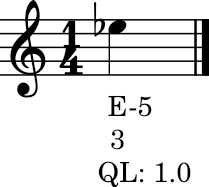

In [126]:
n1.show()

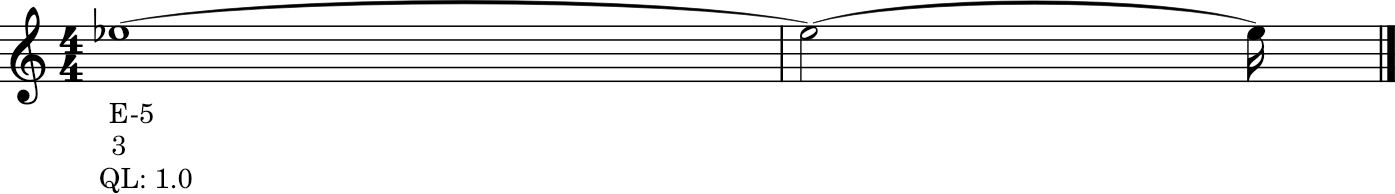

In [127]:
n1.quarterLength = 6.25
n1.show()

## Chapter 4: Lists, Streams (I) and Output

In [128]:
note1 = note.Note("C4")
note2 = note.Note("F#4")

In [129]:
note1.duration.type = 'half'
note1.duration.quarterLength

2.0

In [130]:
note2.duration.quarterLength

1.0

In [131]:
note1.step, note2.step

('C', 'F')

In [132]:
noteList = [note1, note2]

In [133]:
noteList

[<music21.note.Note C>, <music21.note.Note F#>]